## 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 3. Loading the dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nursulthan","key":"abea4c1109726299ba0c503bb7796d65"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp 'kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download dataset (note: -d flag needs the correct dataset path)
!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db

# Unzip it
!unzip -q ultimate-spotify-tracks-db.zip

Dataset URL: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
License(s): unknown
  0% 0.00/15.5M [00:00<?, ?B/s]
100% 15.5M/15.5M [00:00<00:00, 1.24GB/s]


In [5]:
!ls

kaggle.json  sample_data  SpotifyFeatures.csv  ultimate-spotify-tracks-db.zip


In [6]:
df = pd.read_csv('SpotifyFeatures.csv')

## 3. Initial exploration

In [7]:
print("rows, cols", df.shape)

rows, cols (232725, 18)


In [8]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


## 4. Basic cleaning

In [11]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

## 5. Feature Selection & Preprocessing

1.   List item
2.   List item



## 6. Selecting relevant columns

In [12]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [13]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

X = df[features]

In [14]:
X.isnull().sum()

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0
tempo,0


## 7. Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 8. Dimensionality reduction for visualization

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,1.536648,0.017769
1,1.733209,-0.724620
2,-1.718397,-0.105202
3,-1.525501,-0.798694
4,-2.596392,-0.065317


## 9. Choosing the Number of Clusters (k)

Text(0.5, 1.0, 'Elbow Method')

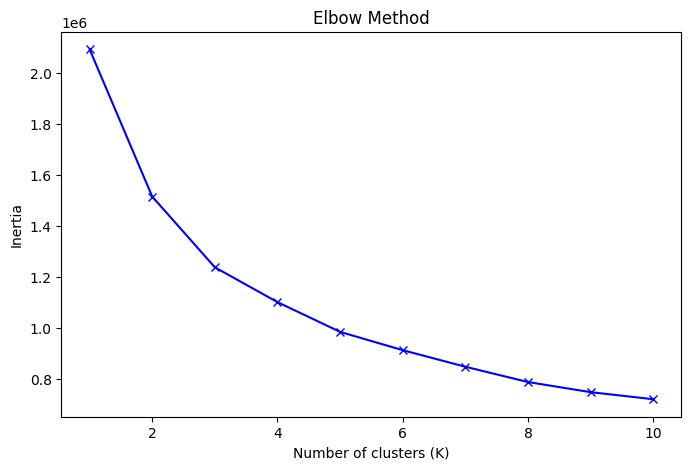

In [21]:
inertia = []
K = range(1, 11)

for k in K :
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

## 10. Run K Means with chosen K

In [23]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_

In [24]:
df['cluster'].value_counts()

,count
cluster,
1,84299
4,65234
0,45375
2,27679
3,10138


## 11. Inspect cluster characteristics

In [26]:
cluster_profile = df.groupby('cluster')[features].mean()
cluster_profile

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.506147,0.332763,-12.008261,0.065861,0.697375,0.066356,0.178686,0.336002,111.752528
1,0.704638,0.670030,-7.041822,0.104922,0.192694,0.059300,0.172583,0.640722,108.926153
2,0.292362,0.165379,-20.922792,0.045696,0.844025,0.740426,0.146678,0.155164,102.478091
3,0.562818,0.663503,-11.988400,0.877456,0.789351,0.001191,0.729090,0.414632,98.023968
4,0.503566,0.766319,-5.947786,0.093683,0.099973,0.091934,0.244200,0.430969,142.572296


## 12. Visualization

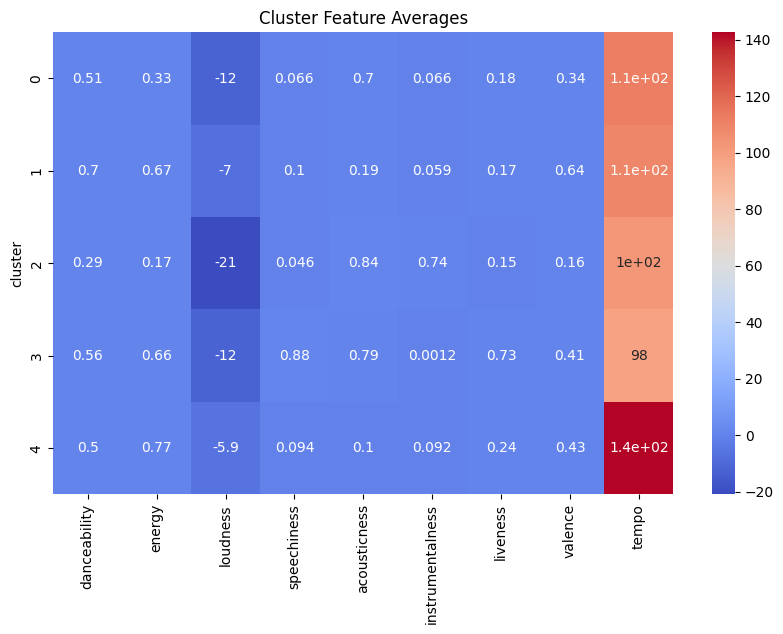

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title("Cluster Feature Averages")
plt.show()

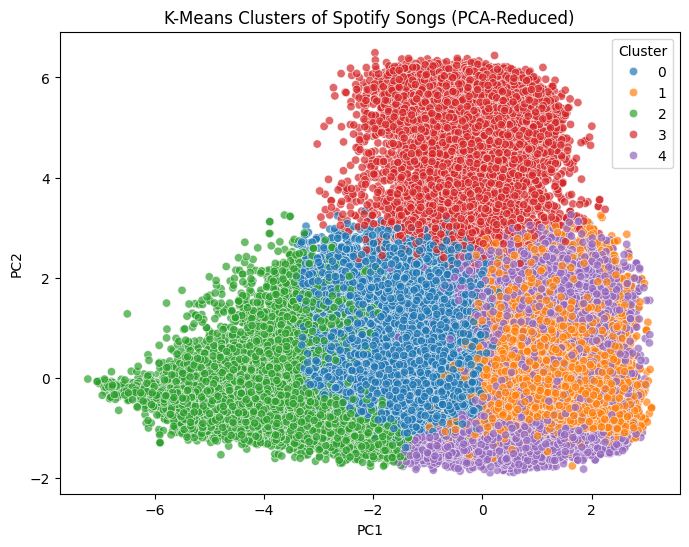

In [30]:
# Attach cluster labels to PCA dataframe
df_pca['cluster'] = df['cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    alpha=0.7
)
plt.title("K-Means Clusters of Spotify Songs (PCA-Reduced)")
plt.legend(title='Cluster')
plt.show()


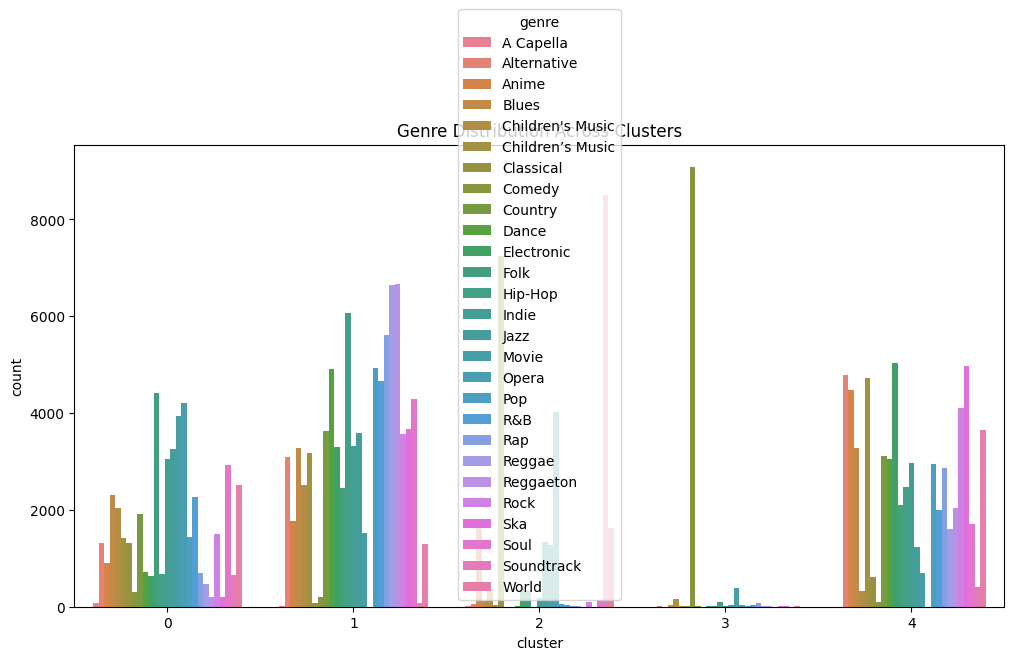

In [31]:
genre_cluster = df.groupby(['cluster', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=genre_cluster, x='cluster', y='count', hue='genre')
plt.title("Genre Distribution Across Clusters")
plt.show()